In [1]:
import numpy as np
import h5py
import scipy.stats as ss
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('colorblind')
sns.set_palette('colorblind')
c=sns.color_palette('colorblind')



In celestial coordinates the solid angle is given by 

$$d \Omega =  d \delta d \alpha \cos \delta $$.

We select all the sample points that from the AGN location of $\alpha_{AGN}=192.4262500 deg$ and $\delta_{AGN}=34.8247222 deg$ form a maximum solid angle of a given threshold.
The solid angle for a data point is 

$\Omega = |\alpha-\alpha_{AGN}| | \sin\delta-\sin \delta_{\rm AGN}|$

In [2]:
ra_c = 192.4262500*np.pi/180
dec_c = 34.8247222*np.pi/180

In [3]:
with h5py.File('./GW190521_posterior_samples.h5', 'r') as f:
    print(list(f.keys()))
    

['IMRPhenomPv3HM', 'NRSur7dq4', 'SEOBNRv4PHM', 'history', 'version']


In [4]:
plt.plot(ds,k(ds))

NameError: name 'ds' is not defined

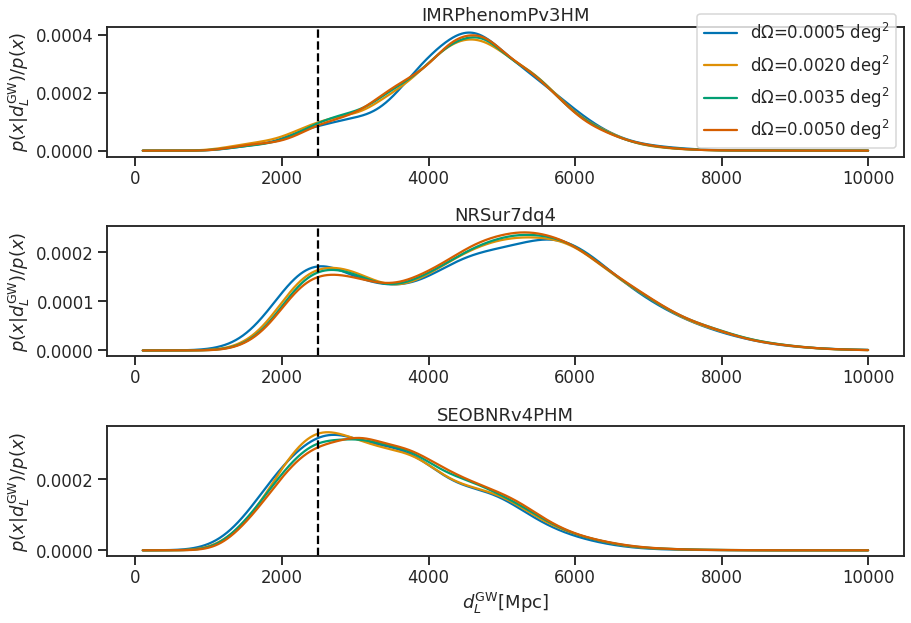

In [5]:
from astropy.cosmology import Planck15 as Planck18_arXiv_v2
fig, (ax0, ax1,ax2) = plt.subplots(3,figsize=(13,9))
i=0

with h5py.File('./GW190521_posterior_samples.h5', 'r') as f:
    
    waveforms=['IMRPhenomPv3HM', 'NRSur7dq4', 'SEOBNRv4PHM']
    ds=np.linspace(100,10000,1000)
    for wave in waveforms:
        samples = np.array(f[wave+'/posterior_samples'])
        for r in np.arange(0.0005,.005,0.0015):
    
            sel = np.where(np.abs(samples['ra']-ra_c)*np.abs(np.sin(samples['dec'])-np.sin(dec_c))<=r)[0]
            k = ss.gaussian_kde(samples['luminosity_distance'][sel],
                                weights=samples['luminosity_distance'][sel]**-2)
            ps = k(ds) # Reflect about d = 0 boundary
            ps[0] = 0.0 # Singularity at d = 0
            pps = ps / np.trapz(ps, ds)
            if i==0: 
                ax0.plot(ds, pps,label=r'd'+'\u03A9'+'={:.4f} deg$^2$'.format(r))#, N-points={:d}'.format(r,len(sel)))
                ax0.set( ylabel=r'$p(x|d^{\rm GW}_L)/p(x)$',title=wave)
                
            if i==1: 
                ax1.plot(ds, pps,label=r'd'+'\u03A9'+'={:.2e} deg$^2$'.format(r))#, N-points={:d}'.format(r,len(sel)))
                ax1.set( ylabel=r'$p(x|d^{\rm GW}_L)/p(x)$',title=wave)
              
            if i==2: 
                ax2.plot(ds, pps,label=r'd'+'\u03A9'+'={:.2e} deg$^2$'.format(r))#, N-points={:d}'.format(r,len(sel)))
                ax2.set( ylabel=r'$p(x|d^{\rm GW}_L)/p(x)$',title=wave)
    
        i=i+1
        
    ax0.axvline(Planck18_arXiv_v2.luminosity_distance(0.438).value,color='k',linestyle='dashed')
    ax1.axvline(Planck18_arXiv_v2.luminosity_distance(0.438).value,color='k',linestyle='dashed')
    ax2.axvline(Planck18_arXiv_v2.luminosity_distance(0.438).value,color='k',linestyle='dashed')
    plt.xlabel(r'$d^{\rm GW}_L$[Mpc]')
    ax0.legend()
    #ax1.legend()
    #ax2.legend()  
    plt.tight_layout()
    plt.show()
    fig.savefig('figures/stacked_los_plot.pdf')
        

In [6]:
r=1e-3
ds=np.linspace(100,10000,1000) 
plt.figure(dpi=100,figsize=(8,5))

with h5py.File('./GW190521_posterior_samples.h5', 'r') as f:
    
    ww=['IMRPhenom', 'NRSur', 'SEONBR']
    waveforms=['IMRPhenomPv3HM', 'NRSur7dq4', 'SEOBNRv4PHM']
    i=0
    for wave in waveforms:
        samples = np.array(f[wave+'/posterior_samples'])
        sel = np.where(np.abs(samples['ra']-ra_c)*np.abs(np.sin(samples['dec'])-np.sin(dec_c))<=r)[0]
        k = ss.gaussian_kde(samples['luminosity_distance'][sel])
        ps = k(ds)# Reflect about d = 0 boundary
        ps[0] = 0.0 # Singularity at d = 0
        pps = ps / np.trapz(ps, ds)
        plt.plot(ds, pps,label=ww[i])
        #np.savetxt('LOS_fit_'+ww[i]+'_1e-3deg2.txt',np.column_stack([ds,pps]))
        i+=1

plt.axvline(Planck18_arXiv_v2.luminosity_distance(0.438).value,color='k',linestyle='dashed')
plt.xlabel(r'$d^{\rm GW}_L$[Mpc]')
plt.ylabel(r'$p(x|d^{\rm GW}_L)/p(x)$')
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig('figures/los_compare_POSTERIOR.pdf')